In [125]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [126]:
confirmed_cases_file_link= "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_cases_file_link= "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_cases_file_link= "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
country_cases_file_link= "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"

In [127]:
confirmed_df= pd.read_csv(confirmed_cases_file_link)
print(confirmed_df.shape)
deaths_df= pd.read_csv(death_cases_file_link)
print(deaths_df.shape)
recovered_df=pd.read_csv(recovered_cases_file_link)
print(recovered_df.shape)
cases_country_df= pd.read_csv(country_cases_file_link)
print(cases_country_df.shape)

(266, 259)
(266, 259)
(253, 259)
(188, 14)


In [181]:
confirmed_df= confirmed_df.replace(np.nan, '', regex=True)
deaths_df= deaths_df.replace(np.nan, '', regex=True)
recovered_df= recovered_df.replace(np.nan, '', regex=True)
cases_country_df= cases_country_df.replace(np.nan, '', regex=True)

In [182]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/23/20', '9/24/20', '9/25/20', '9/26/20', '9/27/20', '9/28/20',
       '9/29/20', '9/30/20', '10/1/20', '10/2/20'],
      dtype='object', length=259)

In [183]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20
0,,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,39145,39170,39186,39192,39227,39233,39254,39268,39285,39290
1,,Albania,41.15330,20.168300,0,0,0,0,0,0,...,12787,12921,13045,13153,13259,13391,13518,13649,13806,13965
2,,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,50400,50579,50754,50914,51067,51213,51368,51530,51690,51847
3,,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1753,1753,1836,1836,1836,1966,1966,2050,2050,2110
4,,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,4363,4475,4590,4672,4718,4797,4905,4972,5114,5211


In [184]:
confirmed_df[confirmed_df["Country/Region"]=="India"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20
143,,India,20.593684,78.96288,0,0,0,0,0,0,...,5732518,5818570,5903932,5992532,6074702,6145291,6225763,6312584,6394068,6473544


In [185]:
confirmed_df[confirmed_df["Country/Region"]=="Austrailia"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20


In [186]:
confirmed_df[confirmed_df["Country/Region"]=="Australia"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,4213,4217,4218,4218,4218,4220,4224,4227,4231,4232
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,33
11,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,1153,1153,1156,1157,1157,1157,1157,1157,1160,1160
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,468,468,468,468,468,468,468,468,468,470
13,Tasmania,Australia,-42.8821,147.3272,0,0,0,0,0,0,...,230,230,230,230,230,230,230,230,230,230
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,20105,20118,20130,20145,20149,20158,20169,20183,20189,20197
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,665,668,668,676,676,676,684,685,685,686


In [187]:
cases_country_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [189]:
confirmed_India_ds=confirmed_df[confirmed_df['Country/Region']=='India']
confirmed_India_ts= confirmed_India_ds.drop(['Lat','Long','Country/Region','Province/State'],axis=1).reset_index(drop=True).sum()

In [190]:
deaths_India_ts= deaths_df[deaths_df['Country/Region']=="India"]
deaths_India_ts= deaths_India_ts.drop(['Lat','Long','Country/Region','Province/State'],axis=1).reset_index(drop=True).sum()

In [191]:
confirmed_India_ts=confirmed_df[confirmed_df['Country/Region']=="India"]
confirmed_India_ts= confirmed_India_ts.drop(['Lat','Long','Country/Region','Province/State'],axis=1).reset_index(drop=True).sum()

In [192]:
recovered_India_ts= recovered_df[recovered_df['Country/Region']=="India"]
recovered_India_ts= recovered_India_ts.drop(['Lat','Long','Country/Region','Province/State'],axis=1).reset_index(drop=True).sum()

In [193]:
active_India_ts= pd.Series(
    data=np.array(
        [x1 - x2 - x3 for (x1, x2, x3) in zip(
            confirmed_India_ts.values, deaths_India_ts.values, recovered_India_ts.values)
        ]
    ),
    index=confirmed_India_ts.index
)

In [194]:
import matplotlib

In [195]:
color_arr= px.colors.qualitative.Dark24

In [196]:
def draw_plot(ts_array, ts_label, title, colors, mode_size, line_size, x_axis_title, y_axis_title, tickangle, yaxis_type, additional_annotations):
    
    fig= go.Figure()
    for index, ts in enumerate(ts_array):
        fig.add_trace(go.Scatter(x=ts.index,
                                y=ts.values,
                                name = ts_label[index],
                                line= dict(color=colors[index], width=line_size[index]), connectgaps=True, ))
        
        #base x axis properties
    x_axis_dict= dict(showline=True, 
                         showgrid=True,
                         showticklabels=True,
                         linecolor='rgb(204,204,204)',
                         linewidth=2,
                         ticks='outside',
                         tickfont=dict(family='Ariel',size=12,color='rgb(82,82,82)',))
    if x_axis_title:
            x_axis_dict['title']=x_axis_title
            
    if tickangle>0:
            x_axis_dict['tickangle']=tickangle
            
    y_axis_dict= dict(showline=True, 
                         showgrid=True,
                         showticklabels=True,
                         linecolor='rgb(204,204,204)',
                         linewidth=2,)
        
    if yaxis_type != "":
            y_axis_dict['type']= yaxis_type
            
    if y_axis_title:
            y_axis_dict['title']=y_axis_title
            
    fig.update_layout(xaxis=x_axis_dict,
                         yaxis=y_axis_dict,
                         autosize= True,
                         margin=dict(autoexpand=True, l=100, r=20, t=110,),
                         showlegend= True,
                         )
        
    annotations=[]
        
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom',
                               text=title,
                               font= dict(family='Ariel', size=16, color='rgb(37,37,37)'), showarrow=False))
        
    if len(additional_annotations) > 0:
            annotations.append(additional_annotations)
            
    fig.update_layout(annotations=annotations)
        
    return fig
        
            
        
    

In [197]:
active_India_ts= pd.Series(
    data=np.array(
        [x1 - x2 - x3 for (x1, x2, x3) in zip(
            confirmed_India_ts.values, deaths_India_ts.values, recovered_India_ts.values)
        ]
    ),
    index=confirmed_India_ts.index
)

In [198]:
ts_array = [confirmed_India_ts, active_India_ts, recovered_India_ts, deaths_India_ts]
labels = ['Confirmed', 'Active', 'Recovered', 'Deaths']
colors = [color_arr[5], color_arr[0], color_arr[2], color_arr[3]]
mode_size= [8, 8, 12, 8]
line_size= [2, 2, 4, 2]

fig_2= draw_plot(ts_array= ts_array,
                ts_label= labels,
                title="COVID-19 Case Trend in India",
                colors=colors, mode_size=mode_size,
                line_size=line_size,
                x_axis_title= "Date",
                y_axis_title= "Case Count",
                tickangle= 315,
                yaxis_type="",additional_annotations=[])
fig_2.show()

In [199]:

deaths_India_ts= deaths_df[deaths_df['Country/Region']=="India"]
deaths_India_ts= deaths_India_ts.drop(['Lat','Long','Country/Region','Province/State'],axis=1).reset_index(drop=True).sum()
confirmed_India_ts=confirmed_df[confirmed_df['Country/Region']=="India"]
confirmed_India_ts= confirmed_India_ts.drop(['Lat','Long','Country/Region','Province/State'],axis=1).reset_index(drop=True).sum()
recovered_India_ts= recovered_df[recovered_df['Country/Region']=="India"]
recovered_India_ts= recovered_India_ts.drop(['Lat','Long','Country/Region','Province/State'],axis=1).reset_index(drop=True).sum()
active_India_ts= pd.Series(
    data=np.array(
        [x1 - x2 - x3 for (x1, x2, x3) in zip(
            confirmed_India_ts.values, deaths_India_ts.values, recovered_India_ts.values)
        ]
    ),
    index=confirmed_India_ts.index
)


In [200]:
ts_array = [confirmed_India_ts, active_India_ts, recovered_India_ts, deaths_India_ts]
labels = ['Confirmed', 'Active', 'Recovered', 'Deaths']
colors = [color_arr[5], color_arr[0], color_arr[2], color_arr[3]]
mode_size= [8, 8, 12, 8]
line_size= [2, 2, 4, 2]

fig_3= draw_plot(ts_array= ts_array,
                ts_label= labels,
                title="COVID-19 Case Trend in India",
                colors=colors, mode_size=mode_size,
                line_size=line_size,
                x_axis_title= "Date",
                y_axis_title= "Case Count",
                tickangle= 315,
                yaxis_type="",additional_annotations=[])
fig_3.show()

In [201]:
ts_array = [confirmed_India_ts[39:], active_India_ts[39:], recovered_India_ts[39:], deaths_India_ts[39:]]
labels = ['Confirmed', 'Active', 'Recovered', 'Deaths']
colors = [color_arr[5], color_arr[0], color_arr[2], color_arr[3]]
mode_size= [8, 8, 12, 8]
line_size= [2, 2, 4, 2]

fig_4= draw_plot(ts_array= ts_array,
                ts_label= labels,
                title="COVID-19 Case Trend in India",
                colors=colors, mode_size=mode_size,
                line_size=line_size,
                x_axis_title= "Date",
                y_axis_title= "Case Count",
                tickangle= 315,
                yaxis_type="",additional_annotations=[])
fig_4.show()

In [202]:
fig_5= draw_plot(ts_array= ts_array,
                ts_label= labels,
                title="Semi log plot of COVID 19 Transmission Timeline in India",
                colors=colors, mode_size=mode_size,
                line_size=line_size,
                x_axis_title= "Date",
                y_axis_title= "Case Count",
                tickangle= 315,
                yaxis_type="log",additional_annotations=[])
fig_5.show()

In [203]:
from scipy.integrate import solve_ivp 

In [204]:
from scipy.optimize import minimize 

In [205]:
import matplotlib.pyplot as plt

In [206]:
from datetime import timedelta, datetime

In [207]:
START_DATE= {
    'Italy': '1/31/20',
    'India': '1/30/20'
}

class Learner(object):
    def __init__(self, country, loss, start_date='1/22/20', predict_range=150, s_0=100000, i_0=2, r_0=10):
        self.country= country
        self.loss = loss
        self.start_date = start_date
        self.predict_range =predict_range
        self.s_0=s_0
        self.i_0=i_0
        self.r_0=r_0
        
    def load_confirmed(self, country):
        df= pd.read_csv(confirmed_cases_file_link)
        df= df.drop(['Province/State'],axis=1)
        country_df= df[df['Country/Region']==country]
        return country_df.iloc[0].loc[self.start_date:]
    
    def load_recovered(self, country):
        df= pd.read_csv(recovered_cases_file_link)
        df= df.drop(['Province/State'],axis=1)
        country_df= df[df['Country/Region']==country]
        return country_df.iloc[0].loc[self.start_date:]
    
    def load_dead(self, country):
        df= pd.read_csv(death_cases_file_link)
        df= df.drop(['Province/State'],axis=1)
        country_df= df[df['Country/Region']==country]
        return country_df.iloc[0].loc[self.start_date:]
    
    def extend_index(self, index, new_size):
        values= index.values
        current= datetime.strptime(index[-1], '%m/%d/%y')
        while len(values) < new_size:
            current= current+ timedelta(days=1)
            values= np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values
    
    def predict(self, beta, gamma, data, recovered, death, country, s_0, i_0, r_0):
        new_index= self.extend_index(data.index, self.predict_range)
        size= len(new_index)
        def SIR(t, y):
            S= y[0]
            I= y[1]
            R= y[2]
            return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
        extended_actual= np.concatenate((data.values, [None]*(size-len(data.values))))
        extended_recovered= np.concatenate((recovered.values, [None]*(size-len(recovered.values))))
        extended_death= np.concatenate((death.values, [None]*(size-len(death.values))))
        return new_index, extended_actual, extended_recovered, extended_death, solve_ivp(SIR, [0,size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))
    
    
    def train(self):
        recovered= self.load_recovered(self.country)
        death= self.load_dead(self.country)
        data= (self.load_confirmed(self.country) - recovered - death)
        
        optimal=minimize(loss,[0.001,0.001], args=(data, recovered, self.s_0, self.i_0, self.r_0), method='L-BFGS-B', bounds=[(0.00000001,0.4),(0.00000001, 0.4)])
        print(optimal)
        beta, gamma= optimal.x
        new_index, extended_actual, extended_recovered, extended_death, prediction= self.predict(beta, gamma, data, recovered, death, self.country, self.s_0, self.i_0, self.r_0)
        df= pd.DataFrame({'Infected data': extended_actual, 'Recovered data': extended_recovered, 'Death data': extended_death,'Susceptible':prediction.y[0], 'Infected': prediction.y[1], 'Recovered': prediction.y[2]}, index= new_index)
        
        df.to_csv(f"{self.country}.csv")
        fig, ax= plt.subplots(figsize=(15,10))
        ax.set_title(self.country)
        df.plot(ax=ax)
        print(f"country={self.country},beta={beta:.8f}, gamma={gamma:.8f},r_0:{(beta/gamma):.8f}")
        fig.savefig(f"{self.country}.png")

In [208]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size= len(data)
    beta, gamma = point
    def SIR (t,y):
        S=y[0]
        I=y[1]
        R=y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1= np.sqrt(np.mean((solution.y[1]-data)**2))
    l2= np.sqrt(np.mean((solution.y[2]-recovered)**2))
    alpha=0.1
    return alpha*11+(1-alpha)*12

In [209]:
india_learner= Learner(country="India", loss=loss , i_0=3 )


      fun: 11.9
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
   status: 0
  success: True
        x: array([0.001, 0.001])
country=India,beta=0.00100000, gamma=0.00100000,r_0:1.00000000


TypeError: cannot unpack non-iterable NoneType object

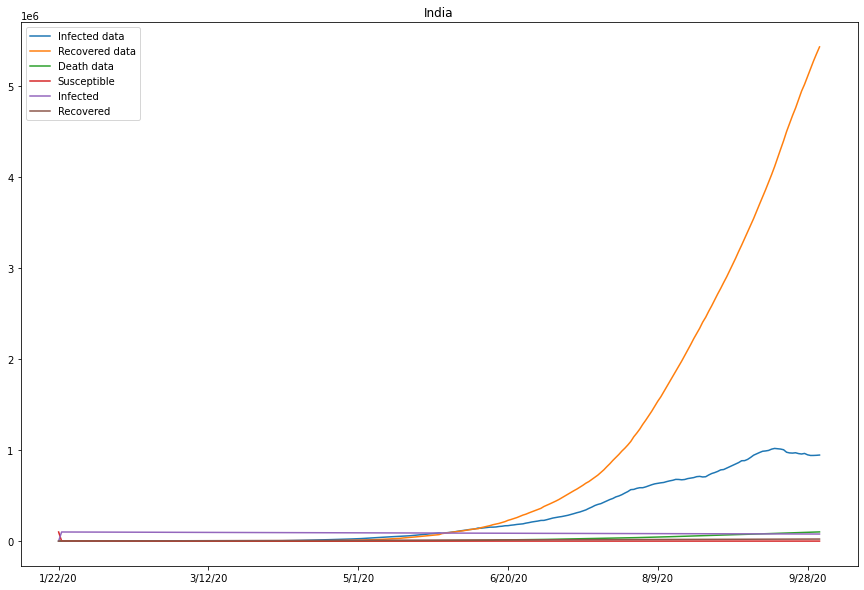

In [210]:
india_sir , india_sir_fig = india_learner.train()

In [178]:
india_sir_df= pd.read_csv('India.csv')
print(india_sir_df.columns)
print(india_sir_df.shape)

Index(['Unnamed: 0', 'Infected data', 'Recovered data', 'Death data',
       'Susceptible', 'Infected', 'Recovered'],
      dtype='object')
(255, 7)


In [179]:
india_sir_df=india_sir[:77]

TypeError: 'NoneType' object is not subscriptable